# <span style="color:blue">Rayleigh-Benard Convection</span>

![alt text](images/Benard cells 3D.png)

Natural convection is a mechanism where motion is induced in a fluid, not 
through artificial means but by the effects of bouyancy. One of the most commonly studied convection phenomenon, is the Rayleigh-Benard convection. When a thin layer of fluid is heated from below, once the temperature difference, between the top and bottom fluid layers, grows large enough, convection cells, also called Benard cells, form within the fluid. As a result, some interesting patterns can be observed in the fluid.

![alt text](images/Bénard_cells_convection.ogv.jpg)

In the 1900s, Henri Benard studied convection by heating a thin layer of fluid from below. Benard's experiments attempted to emulate a layer of fluid that was infinitely long.

Inspired by Benard's experiments, in 1916, Lord Rayleigh.....Rayleigh was more interested in the stability aspect of Benard's problem. He showed that when the temperature gradient was high enough to make the Rayleigh number exceed a critical value, instability would occur, leading to the formation of Benard cells.

$$Ra = \frac{\alpha \Delta Tgh^3}{\nu D }$$

Where,
                                $$\alpha =  thermal  expansion  coefficient$$                               
                                $$\nu = $$kinematic viscosity
                                $$D = $$thermal diffusivity

## Problem Setup

For this case, we will be considering a layer of fluid placed between to rigid plates.

![alt text](images/Set-up.jpg)

The length of the fluid is assumed to be sufficiently larger than the height, so that it can be considered infinite. Benard's original experiments, used a height 1 mm and a length of 20 cm.(Benard cells and Taylor Vortices)

There are four boundary conditions. Two on each of the rigid plates. The temperatures at the plates are assumed to be constant and the no slip condition is applied.

$$T_{(x,t)}|_{y=0} = T_{o}$$
$$T_{(x,t)}|_{y=h} = T_{1}$$
$$u_{(x,t)}|_{y=0} = 0$$
$$u_{(x,t)}|_{y=h} = 0$$

For initial conditions, the fluid is at rest and the temperature is assumed to be linearly distributed.

$$T_{(x,t)}|_{t=0} = T_{o} + \frac{y}{h}(T_{1}-T{o})$$
$$u_{(x,t)}|_{t=0} = 0$$

## Governing Equations

The governing equations for this case, are derived by applying the Boussinesq approximation to the Navier-Stokes equations. The Boussinesq approximation neglects all density changes in the momentum and continuity equations, except for the gravity term. The assumption is, that the density changes are small compared to the velocity gradients. The gravitational constant is, however, strong enough to make it relevant.

$$\nabla \cdot u = 0$$
$$\frac{\partial u}{\partial t} + u\cdot \nabla u = -\frac{1}{\rho_{o}}\nabla p + \frac{\rho}{\rho_{o}}g + \nu\nabla^2u$$

Under the same assumption, the density can be shown to have a linear dependancy on the temperature.

$$\rho = \rho_{o}(1-\alpha(T-T_{o})$$

And finally, the thermal energy equation can be approximated to a familiar form.

$$\frac{\partial T}{\partial t} + u\cdot \nabla T = D\nabla^2T$$

Where the thermal diffusivity, $$D = \frac{k}{\rho c}$$

## Discretization

For this problem, I have decided to apply a forward-time central-space discretization scheme. As the boundary conditions for the pressure, depend on the fluid velocity, which is in turn dependant on the pressure, they are difficult to uncouple. One way to decouple the pressure and velocity terms, is by using Chorin's projection method. This is a two step process, not unlike the MacCormack method.

An intermediate velocity term is first calcualted, free of the pressure gradient. 

$$\frac{\partial u}{\partial t} + u\cdot \nabla u = \frac{\rho}{\rho_{o}}g + \nu\nabla^2u$$

This is then used to calculate the pressure gradient for the next time step, which calcualates the next iteration of the velocity field. To find the intermediate velocity, 'u_star', we discretize the above equation using forward-time central space scheme.

$$u_{i,j}^{*} = u_{I,j}^{n} + dt(- \frac{u_{i,j}^{n}}{2\delta}(u_{i+1,j}^{n} - u_{i-1,j}^{n} + u_{i,j+1}^{n} - u_{i,j-1}^{n}) + \frac{\nu_{i,j}}{\delta^2}(u_{i+1,j}^{n} + u_{i-1,j}^{n} + u_{i,j+1}^{n} + u_{i,j-1}^{n} - 4u_{i,j}^{n}))$$

Where,
$$\delta = dx = dy$$

On taking the divergence of the momentum equation and using the continuity equation, we end up with a Poisson's equation, relating the pressure with u_star.

$$-\nabla^2 p = -\frac{\rho_{o}}{dt}\nabla \cdot u^{*}$$

In discretized form,

$$p_{i,j}^{n+1} = \frac{1}{4}(p_{i+1,j}^{n} + p_{i-1,j}^{n} + p_{i,j+1}^{n} + p_{i,j-1}^{n} - \frac{\rho_{o}}{dt}\delta u_{i,j}^{*})$$

This equation can be solved using 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
H = 0.25
L = 1

alpha = 207*10**(-6) #Volume expansion coefficient of water @ 20 C
k = 0.6     #Thermal conductivity of water @ 20 C

#ReC = 1100.65 #Critical Rayleigh number for one free and one rigid boundary condition
ReC = 1708     #Critical Rayleigh number for two rigid body boundary condition
g = 9.81
D = 0.143E-6  #Thermal diffusivity of water
rho_i = 1000   #Density of water @ 20 C

L = 10
H = 0.01

nxy = 101
nt = 500

dxy = L/(nxy-1)

x = np.linspace(0,L,nxy)
y = np.linspace(0,H,nxy)
ya = np.ones((nxy,nxy))
for i in range(nxy):
    ya[:,i] = y
#Change to Kelivin?
To = 20
vo = 2.414*10**(-5) * 10**(247.8/(To + 273 - 140)) / rho_i  #initial kinematic viscosity of water
delT = (ReC*vo*1.43*10**(-7))/(alpha*g*H**3)
Ti = np.ones((nxy, nxy))*To
Ti[-1,:] = To + 30

rho = np.ones((nxy,nxy), dtype=float)*rho_i
rho[0,:] = rho_i*(1-alpha*(Ti[0,:] - To))

v = np.ones((nxy,nxy))*2.414*10**(-5) * 10**(247.8/(Ti + 273 - 140)) / rho  #kinematic viscosity of water

pi = np.zeros((nxy,nxy), dtype=float)
pi[:,:] = rho[:,:] * ya[:,:] * g

ui = np.zeros((nxy,nxy), dtype=float)

print('delT =',delT, 'Tl =',20+delT)
print(vo)
#print('x =', x, 'y =', y)

delT = 0.12092877677020468 Tl = 20.120928776770203
1.0054144180571545e-06


In [3]:
# stability
sigma = 0.00005
#dt = sigma*min(dxy,dxy)**2/D
dt = 0.001

print(dt)

0.001


In [4]:
print(dxy)

0.1


In [5]:
def ftcs(T, To, u, p, rho, rho_i, alpha, v, k, g, y, delT, nt, dt, dxy):
    
    for n in range(nt):
        
        # Boundary conditions
        u[-1,:] = 0 #Top Boundary
        u[0,:] = 0   #Bottom Boundary
        T[0,:] = To + 30 #Bottom Boundary
        T[-1,:] = To   #top Boundary

        un = u.copy()
        Tn = T.copy()
        pn = p.copy()
        vn = v.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + dt*((un[1:-1,1:-1]/dxy)*(Tn[2:,1:-1]\
                    + Tn[1:-1,2:] - (2*Tn[1:-1,1:-1])) + 
                    (k/dxy**2)*(Tn[2:,1:-1] + Tn[:-2,1:-1] + Tn[1:-1,2:]\
                    + Tn[1:-1,:-2] - (4*Tn[1:-1,1:-1])))
        
        rho[1:-1,1:-1] = rho_i*(1- alpha*(T[1:-1,1:-1] - 20))
        p[1:-1,1:-1] = rho[1:-1,1:-1]*ya[1:-1,1:-1] * g
        
        v[1:-1,1:-1] = 2.414*10**(-5) * 10**(247.8/(T[1:-1,1:-1] + 273 - 140)) / rho[1:-1,1:-1]
        
        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-(1/rho_i)*(p[2:,1:-1] + p[1:-1,2:] - 2*p[1:-1,1:-1]) + (rho[1:-1,1:-1]*g/rho_i)\
                                           + (1/dxy)*(u[1:-1,1:-1]*0.5*(u[2:,1:-1] - u[:-2,1:-1] \
                                                                      + u[1:-1,2:] - u[1:-1,:-2]) \
                                           + (v[1:-1,1:-1]/dxy)*(u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] - 4*u[1:-1,1:-1])))

                                           
    return T

In [6]:
T = ftcs(Ti,To,ui,pi,rho,rho_i,alpha,v,k,g,y,delT,nt,dt,dxy)

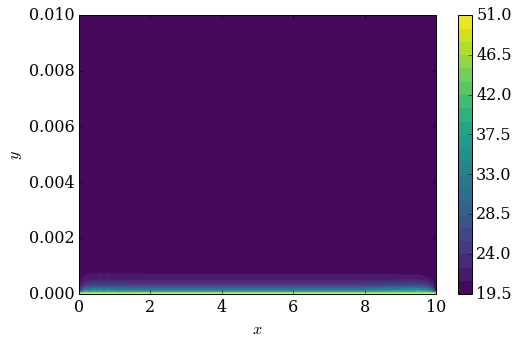

In [7]:
plt.figure(figsize=(8,5))
plt.contourf(x,y,Ti,20,cmap=cm.viridis)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();


In [8]:
print(T)

[[ 50.          50.          50.         ...,  50.          50.          50.        ]
 [ 20.          31.24606041  35.92810255 ...,  35.63953431  31.71920868
   20.        ]
 [ 20.          25.96178197  28.87450968 ...,  28.46203708  25.33425292
   20.        ]
 ..., 
 [ 20.          20.          20.         ...,  20.          20.          20.        ]
 [ 20.          20.          20.         ...,  20.          20.          20.        ]
 [ 20.          20.          20.         ...,  20.          20.          20.        ]]


In [9]:
print(ui.argmax())

102


In [10]:
print(ui[1,3])

61.216268941


In [11]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

value = 900

loc = find_nearest(ui, value)
print(loc)

102


In [12]:
print(np.abs(ui-900).min())

830.033812255


In [13]:
print(np.where(ui==900-np.abs(ui-900).min()))

(array([1], dtype=int64), array([1], dtype=int64))


In [14]:
print(ui)

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          69.96618775   0.35068574 ...,   2.53918912   1.3582699    0.        ]
 [  0.           0.35718329   2.76598709 ...,   1.53694795   1.09842556
    0.        ]
 ..., 
 [  0.           2.54165246   1.53732047 ...,   1.5593685    1.0969332    0.        ]
 [  0.           1.35954534   1.09874381 ...,   1.0969332    0.89407909
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
